In [1]:
from boopnet import extract_from_pdf

import warnings
warnings.filterwarnings("ignore")

/Users/qcaudron/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Teaching a computer to see

### Computer vision for computational real estate

23 May, 2018

# What is machine learning ?

**Machine learning** : giving computers the ability to *learn*

**Learning** : to get progressively better at a certain *task*



**Task** : typically, recognising patterns in data

### Some tasks that your computer can perform

<img src="images/intro.png" width="1000px" />

<img src="images/gan.png" width="800px" />

**Second Senator:**
<br />
They are away this miseries, produced upon my soul,
<br />
Breaking and strongly should be buried, when I perish
<br />
The earth and thoughts of many states.

**DUKE VINCENTIO:**
<br />
Well, your wit is in the care of side and that.

**Second Lord:**
<br />
They would be ruled after this chamber, and
<br />
my fair nues begun out of the fact, to be conveyed,
<br />
Whose noble souls I'll have the heart of the wars.

**Clown:**
<br />
Come, sir, I will make did behold your worship.

**VIOLA:**
<br />
I'll drink it.

In [2]:
from IPython.display import HTML

youtube = '<iframe width="700" height="450" \
    src="https://www.youtube.com/embed/{}?rel=0&amp;controls=1&amp;showinfo=1" \
    frameborder="1" allowfullscreen></iframe>'

In [3]:
HTML(youtube.format("j60J1cGINX4"))

In [4]:
HTML(youtube.format("t5--kLRI4UE"))

<img src="images/seeing.png" width="600px" />

$$ \Huge f : x \to y $$

# Let's do a little machine learning.

Let's predict how productive we're going to be, as a function of coffee intake.

In [26]:
import numpy as np

# Generate some observations of this physical process
N = 500

# Input data -- x
blood_caffeine = np.linspace(0, 0.1, N).reshape(-1, 1)

blood_caffeine

array([[0.        ],
       [0.0002004 ],
       [0.0004008 ],
       [0.0006012 ],
       [0.0008016 ],
       [0.001002  ],
       [0.0012024 ],
       [0.00140281],
       [0.00160321],
       [0.00180361],
       [0.00200401],
       [0.00220441],
       [0.00240481],
       [0.00260521],
       [0.00280561],
       [0.00300601],
       [0.00320641],
       [0.00340681],
       [0.00360721],
       [0.00380762],
       [0.00400802],
       [0.00420842],
       [0.00440882],
       [0.00460922],
       [0.00480962],
       [0.00501002],
       [0.00521042],
       [0.00541082],
       [0.00561122],
       [0.00581162],
       [0.00601202],
       [0.00621242],
       [0.00641283],
       [0.00661323],
       [0.00681363],
       [0.00701403],
       [0.00721443],
       [0.00741483],
       [0.00761523],
       [0.00781563],
       [0.00801603],
       [0.00821643],
       [0.00841683],
       [0.00861723],
       [0.00881764],
       [0.00901804],
       [0.00921844],
       [0.009

In [27]:
# Output data : the observed, noisy, process -- y
real_productivity = 3.6 * blood_caffeine + 4.1
observed_productivity = (
    real_productivity + 
    0.05 * np.random.randn(*real_productivity.shape)
)

observed_productivity

array([[4.12623488],
       [4.15939321],
       [4.08985487],
       [4.09719907],
       [4.08917193],
       [4.15830095],
       [4.07805011],
       [4.12397526],
       [4.02425941],
       [4.08607489],
       [4.13584766],
       [4.10766243],
       [4.05497741],
       [4.05709908],
       [4.15525707],
       [4.07136144],
       [4.06845871],
       [4.06811048],
       [4.18048201],
       [4.1480066 ],
       [3.98403473],
       [4.10648559],
       [4.10816772],
       [4.10445118],
       [4.17762365],
       [4.05898293],
       [4.16911499],
       [4.16114549],
       [4.15594882],
       [4.10918602],
       [4.08112569],
       [4.06647056],
       [4.05301394],
       [4.12753241],
       [4.09041062],
       [4.06494987],
       [4.16789886],
       [4.12150869],
       [4.12095145],
       [4.12286513],
       [4.17962188],
       [4.17483857],
       [4.03545774],
       [4.09995069],
       [4.20333592],
       [4.10057853],
       [4.13224578],
       [4.116

Text(0,0.5,'Productivity')

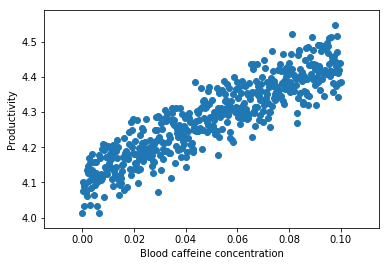

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the data
plt.scatter(blood_caffeine, observed_productivity)
plt.xlabel("Blood caffeine concentration")
plt.ylabel("Productivity")

Using the simplest of ML models, can we find the relationship between coffee and productivity from this noisy observational data ?

In [7]:
from sklearn.linear_model import LinearRegression

# Let's fit a linear model to this data
model = LinearRegression()
model.fit(blood_caffeine, observed_productivity)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This is a huge part of machine learning : *finding functions that map inputs to outputs*.

Real model :          y = 3.6x + 4.1
Our estimated model : y = 3.5x + 4.1


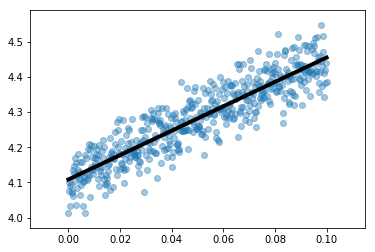

In [8]:
# We can use our model to make predictions :
# Given our inputs, what do we think our outputs will be ?
predictions = model.predict(blood_caffeine)

# Plot our model over the underlying data
plt.scatter(blood_caffeine, observed_productivity, alpha=0.4)
plt.plot(blood_caffeine, predictions, lw=4, c="k")

print("Real model :          y = 3.6x + 4.1")
print("Our estimated model : y = {:.1f}x + {:.1f}".format(
    model.coef_[0][0], model.intercept_[0]))

### What happens when the data is more complicated ?

Our observations stopped at caffeine levels of 10% of blood levels. Clearly, these observations did not come from this office.

Let's see what happens when we caffeinate some more. It's lunch time, after all.

In [9]:
# How many input data observations do we have ?
real_productivity.shape

(500, 1)

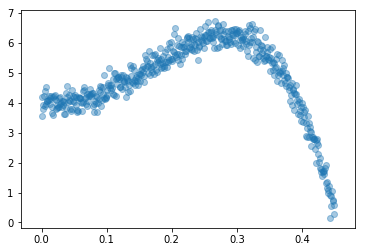

In [10]:
# Actual model coefficients
real_coefficients = [-300, -98.8, 100.1, -6., 0.]

# Generate some observations up to 45% blood caffeine concentrations
blood_caffeine = np.linspace(0, 0.45, N).reshape(-1, 1)
real_productivity = np.polyval(real_coefficients, blood_caffeine) + 4.1
observed_productivity = real_productivity + \
    0.25 * np.random.randn(*real_productivity.shape)

plt.scatter(blood_caffeine, observed_productivity, alpha=0.4)

Turns out, our productivity isn't linear in the amount of caffeine you drink ! Who knew ?

We're about to encounter a limit of the linear regression : it doesn't fare so well on *nonlinear* data.

Text(0,0.5,'Productivity')

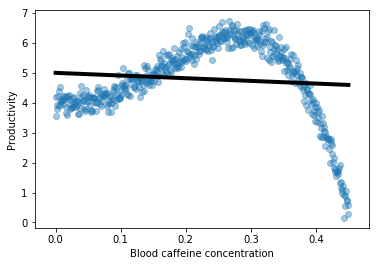

In [11]:
# Let's fit a linear regression to our data, as before
model = LinearRegression()
model.fit(blood_caffeine, observed_productivity)

# Generate predictions, and plot them
predictions = model.predict(blood_caffeine)

plt.scatter(blood_caffeine, observed_productivity, alpha=0.4)
plt.plot(blood_caffeine, predictions, lw=4, c="k")
plt.xlabel("Blood caffeine concentration")
plt.ylabel("Productivity")

### Feature engineering

In much of ML, we need to *transform* the data in some way :

- to make it easier for the model to consume
- to make some traits in the data more accessible or evident
- to satisfy certain assumptions or requirements that the model may have

In [12]:
print("Our input data has the shape {}".format(blood_caffeine.shape))
print("The first few values are :\n{}".format(blood_caffeine[:5, :]))

Our input data has the shape (500, 1)
The first few values are :
[[0.        ]
 [0.0009018 ]
 [0.00180361]
 [0.00270541]
 [0.00360721]]


A very quick trick for this kind of data is to generate some *polynomial features* from the input data.

In [13]:
from sklearn.preprocessing import PolynomialFeatures

# Generate up to degree-3 polynomial features
feature_transformer = PolynomialFeatures(degree=3, include_bias=True)
blood_caffeine_poly = feature_transformer.fit_transform(blood_caffeine)

print("The first few values of our engineered features are :\n{}".format(
    blood_caffeine_poly[:5, :]))

The first few values of our engineered features are :
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 9.01803607e-04 8.13249746e-07 7.33391554e-10]
 [1.00000000e+00 1.80360721e-03 3.25299898e-06 5.86713244e-09]
 [1.00000000e+00 2.70541082e-03 7.31924771e-06 1.98015720e-08]
 [1.00000000e+00 3.60721443e-03 1.30119959e-05 4.69370595e-08]]


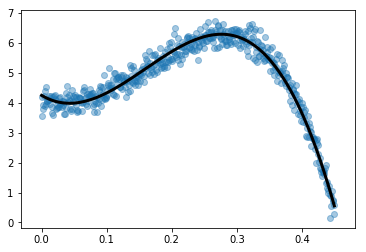

In [14]:
# Let's fit a linear regression model with our engineered features
model = LinearRegression()
model.fit(blood_caffeine_poly, observed_productivity)

# Generate predictions, and plot them
predictions = model.predict(blood_caffeine_poly)
plt.scatter(blood_caffeine, observed_productivity, alpha=0.4)
plt.plot(blood_caffeine, predictions, c="k", lw=3)#, s=10)

Linear regressions are arguably the most basic of ML models. With it, we've extracted a (linear) pattern between inputs and outputs. 

For datasets like ours, there are a few easy transforms we can apply to allow a linear regression to better learn our function. However, we aren't restricted to linear regressions. Let's look at something more powerful.

### Neural networks

<img src="images/fc.jpeg" width="600px" />

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Neural networks are sensitive to feature scaling, so let's rescale them
scaler = StandardScaler()
scaled_blood_caffeine = scaler.fit_transform(blood_caffeine)
scaled_productivity = scaler.fit_transform(observed_productivity)

# Build a simple fully-connected neural network
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=1))
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile and train it
model.compile(optimizer="adam", loss="mse")
history = model.fit(
    scaled_blood_caffeine, scaled_productivity, epochs=100, verbose=0)

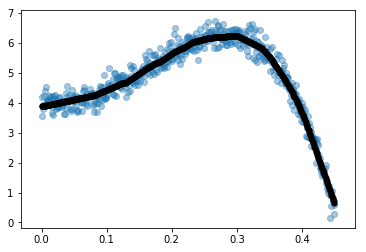

In [16]:
# Generate some predictions and rescale them to our original dimensions
unscaled_predictions = model.predict(scaled_blood_caffeine)
predictions = scaler.inverse_transform(unscaled_predictions)

plt.scatter(blood_caffeine, observed_productivity, alpha=0.4)
plt.scatter(blood_caffeine, predictions, lw=3, s=10, c="k")

### This isn't quite fair.

The neural network has *seen* the data it's using to predict against.

Unlike with a linear regression, where we're trying to learn a simple relation, this neural network has a lot more parameters ( 449 vs 6 ). It's only seeing 500 datapoints, so it can almost just learn them by heart. We need to confirm that it's learning a *relation* and not just the data. This would be called *overfitting*, and is bad news.

In [17]:
from sklearn.model_selection import train_test_split

# Break the data up into two sets : a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(
    scaled_blood_caffeine, 
    scaled_productivity, 
    test_size=0.3
)

# Rebuild the model
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=1))
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile and train it against only the training data,
# using the validation data to ensure things are going well
model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, epochs=100, 
                    verbose=0, validation_data=(X_test, y_test))

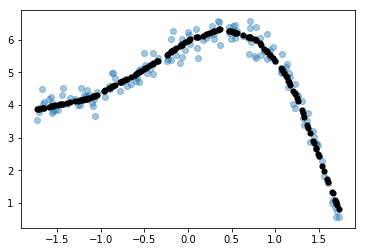

In [18]:
# Generate predictions on *unseen* data
predictions = scaler.inverse_transform(model.predict(X_test))

# Plot the true unseen data and the predictions made on this unseen data
plt.scatter(X_test, scaler.inverse_transform(y_test), alpha=0.4)
plt.scatter(X_test, predictions, lw=3, s=10, c="k")

Text(0.5,0,'Epochs')

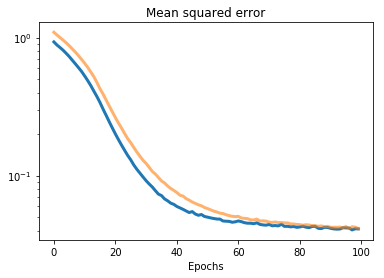

In [19]:
# How did our training go ?
plt.semilogy(history.history["loss"], lw=3)
plt.semilogy(history.history["val_loss"], lw=3, alpha=0.6)
plt.title("Mean squared error")
plt.xlabel("Epochs")

### We didn't do any feature engineering here.

There's a theorem that states that neural networks are *universal approximation machines*. This means that a neural network with a single hidden layer and some finite number of neurons can approximate any continuous function. More neurons and more layers leads to better approximations.

Another fun thing : neural networks are said to learn *representations*. That is, they learn some sort of view of the data that allows them to approximate the target function. Because of this, deep learning goes a long way to alleviating your responsibility to perform feature engineering, because the network will do this for you.

### Computer vision with deep learning

<img src="images/ced.png" width="800px" />

In [20]:
import json
from glob import glob

from skimage import io, transform, color, morphology, filters
from keras.models import load_model
from keras import backend as K


def preprocess(image, model=None):
    """
    Given an RGB(A) image, ensure its resolution matches that of the 
    neural network model, and squash the alpha channel, if any.
    """
    
    if model is None:
        x, y = 400, 304
    else:
        x, y = model.get_input_shape_at(0)[1:3]
        
    # Ensure image is portrait in orientation
    if image.shape[1] > image.shape[0]:
        rotated = True
        image = transform.rotate(image, 90, resize=True)
    else:
        rotated = False
    
    # Rescale image to 400x304 pixels
    original_size = image.shape
    rescale_factor = (x/image.shape[0], y/image.shape[1])
    image = transform.rescale(image, rescale_factor)

    # We don't like transparency
    if len(image.shape) == 3 and image.shape[2] == 4:
        image = color.rgba2rgb(image)
    
    return image


def postprocess(original_image, mask, sensitivity=0.7):
    """
    Given an original image, and a ( probably ) smaller mask returned 
    by the convolutional encoder-decoder, along with some metadata 
    such as the image's rescale factor, and whether it was rotated, 
    return a tight crop of the original image containing the floor 
    plan only.
    """
    
    # Remove singleton dimension to yield a (400, 304) image
    # from the predicted (400, 304, 1) image
    mask = mask.squeeze()
    
    # First, assess whether the image contains significant information or just noise
    if mask.max() < sensitivity:  # If not, set it to zero and return that
        return None
        
    else:  # If it contains info, clean it up
        
        # Begin by thresholding using Otsu's method
        mask = mask > filters.threshold_otsu(mask)
        
        # Remove small connected components
        mask = morphology.remove_small_objects(mask, 500)

        # If we've removed everything, it was noise
        if mask.sum() < 1:
            return None

        # Compute the convex hull
        hull = morphology.convex_hull_image(mask)

        # Grab the minimal bounding box around the hull
        x = hull.max(0)
        y = hull.max(1)
        x_min = np.argmax(x[1:] * (1-x[:-1]))
        x_max = np.argmax((1-x[1:]) * x[:-1]) + 2
        y_min = np.argmax(y[1:] * (1-y[:-1]))
        y_max = np.argmax((1-y[1:]) * y[:-1]) + 2
       
        # Crop the image to the bounding box
        bounding_box = original_image[y_min:y_max, x_min:x_max, :]

        # If the image contains an alpha channel, squash it
        if bounding_box.shape[2] == 4:
            bounding_box = color.rgba2rgb(bounding_box)

        return bounding_box
    
    
def load_image(image_filename, model=None):
    return preprocess(io.imread(image_filename), model=model)
    
    
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def comparison(images, model):
    
    plt.figure(figsize=(15, 25))
    
    for idx, (input_file, output_file) in enumerate(images.items()):
        
        input_image = preprocess(io.imread(input_file), model)
        output_image = preprocess(io.imread(output_file), model)
        prediction = postprocess(input_image, model.predict(input_image.reshape(1, *input_image.shape)))
        if prediction is None:
            prediction = np.zeros_like(mask)
        
        plt.subplot(5, 3, 3*idx+1)
        plt.imshow(input_image)
        plt.grid(0)
        
        plt.subplot(5, 3, 3*idx+2)
        plt.imshow(output_image, cmap="gray")
        plt.grid(0)
        
        plt.subplot(5, 3, 3*idx+3)
        plt.imshow(prediction)
        plt.grid(0)
        
    plt.tight_layout()


custom_objects = {"dice_coef": dice_coef, "dice_coef_loss": dice_coef_loss, "K": K}
inputs = glob("/Users/QCaudron/Google Drive (quentin.caudron@cbredev.com)/NEW/input/*.png")
outputs = glob("/Users/QCaudron/Google Drive (quentin.caudron@cbredev.com)/NEW/output/*.png")

easy = {"/Users/QCaudron/Google Drive (quentin.caudron@cbredev.com)/NEW/input/" + i :
        "/Users/QCaudron/Google Drive (quentin.caudron@cbredev.com)/NEW/output/" + i for i in [
    "1d67dca8-53cf-11e8-8fb4-b8e85648020a_0000.png",
    "01fa987a-53cf-11e8-b7f0-b8e85648020a_0001.png",
    "02ba4680-53d0-11e8-82c6-b8e85648020a_0001.png",
    "2e9bd9f8-53d0-11e8-914e-b8e85648020a_0000.png",
    "3e903148-53cf-11e8-91ca-b8e85648020a_0002.png"]
}
hard = {"/Users/QCaudron/Google Drive (quentin.caudron@cbredev.com)/NEW/input/" + i :
        "/Users/QCaudron/Google Drive (quentin.caudron@cbredev.com)/NEW/output/" + i for i in [
    "3ec1968c-53d1-11e8-94ef-b8e85648020a_0002.png",
    "5f669092-53cf-11e8-be85-b8e85648020a_0001.png",
    "6cc5ba00-53d0-11e8-96d7-b8e85648020a_0002.png",
    "8e27509e-53d0-11e8-9141-b8e85648020a_0000.png",
    "66709850-53d0-11e8-a7a7-b8e85648020a_0001.png"]
}

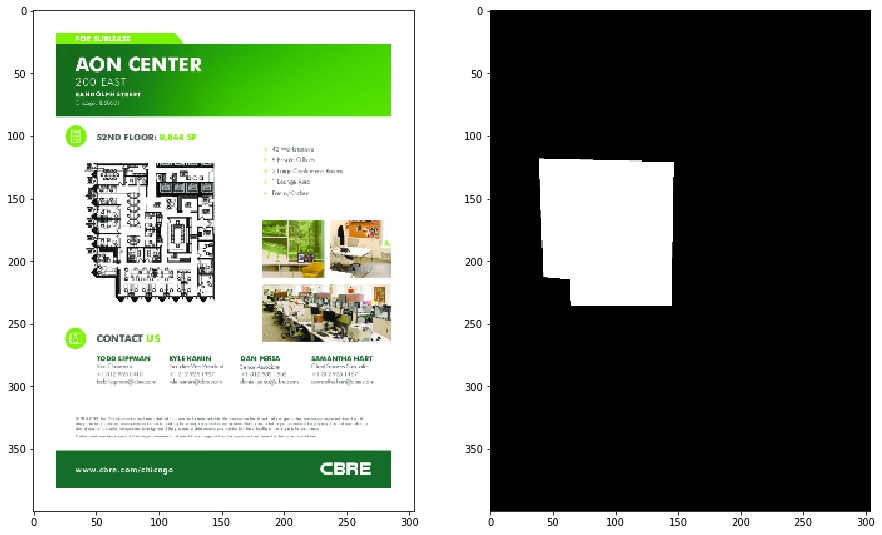

In [21]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1); plt.imshow(load_image(inputs[1]))
plt.subplot(1, 2, 2); plt.imshow(load_image(outputs[1]), cmap="gray")

In [22]:
# Let's load a deep neural net that we previously trained on AWS
deep_net = load_model(
    "../boopnet.hdf5", 
    custom_objects=custom_objects
)

# Load the network's training history
net_history = json.load(open("../boopnet.json"))

print("This network has {:,} parameters.".format(
    deep_net.count_params()))

# Thank you Julien, JWarren, Lorenzo !

This network has 1,442,433 parameters.


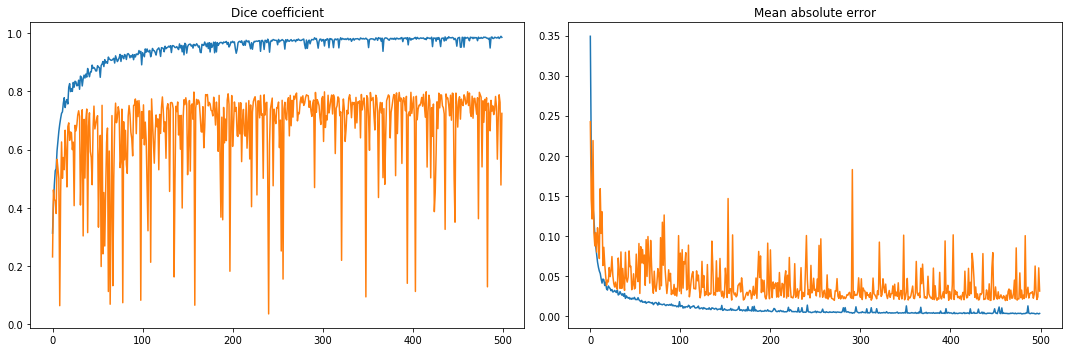

In [23]:
# Training the network : 500 epochs, 11 seconds per epoch
# Total cost : $6

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(net_history["dice_coef"])
plt.plot(net_history["val_dice_coef"])
plt.title("Dice coefficient")

plt.subplot(122)
plt.plot(net_history["mean_absolute_error"])
plt.plot(net_history["val_mean_absolute_error"])
plt.title("Mean absolute error")

plt.tight_layout()

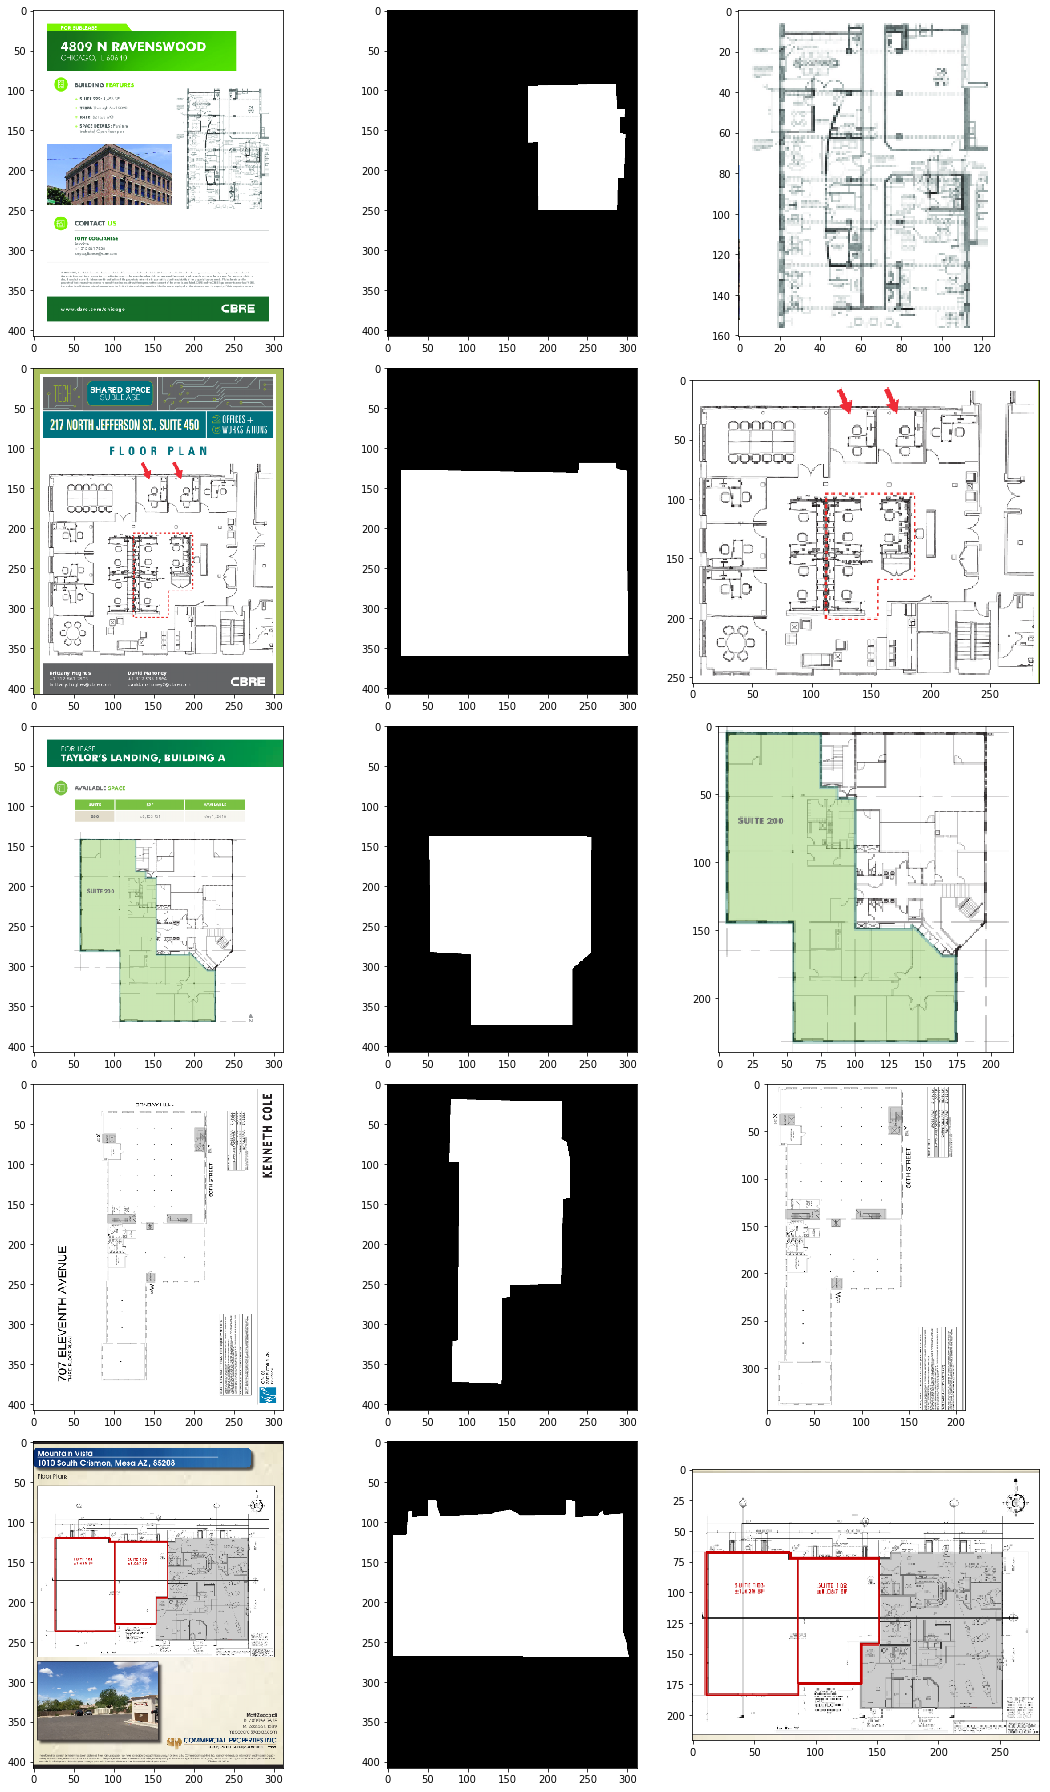

In [24]:
comparison(easy, deep_net)

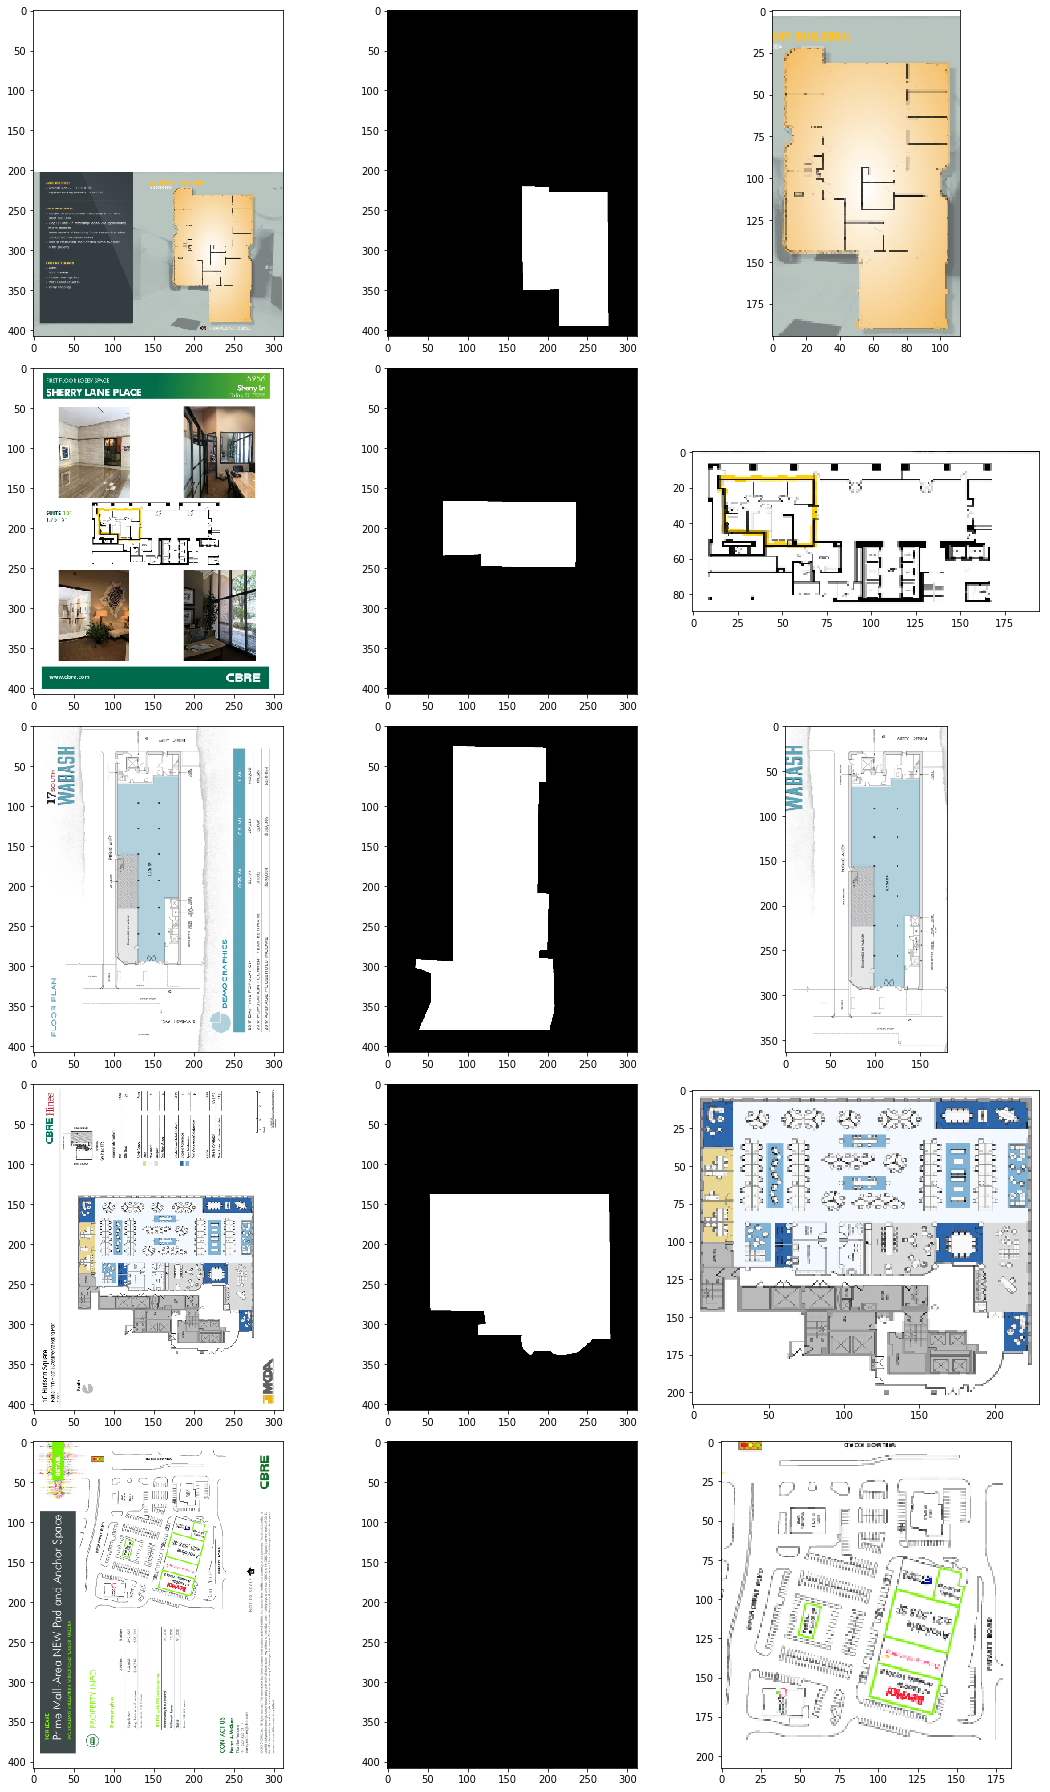

In [25]:
comparison(hard, deep_net)

### Live demo

In [1]:
from boopnet import extract_from_pdf, extract_all_from_directory

extract_all_from_directory("test")

/Users/qcaudron/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



Converting test/1 2.pdf to single-page PNGs.
Processing image /tmp/50a41b94-5ec2-11e8-a381-b8e85648020a__page_000.png


/Users/qcaudron/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


  No floor plan found; continuing.
Processing image /tmp/50a41b94-5ec2-11e8-a381-b8e85648020a__page_001.png
  Floor plan found ! Writing test/1 2.pdf__001.png

Converting test/1.pdf to single-page PNGs.


/Users/qcaudron/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Processing image /tmp/583d63cc-5ec2-11e8-a13d-b8e85648020a__page_000.png


/Users/qcaudron/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


  No floor plan found; continuing.
Processing image /tmp/583d63cc-5ec2-11e8-a13d-b8e85648020a__page_001.png
  No floor plan found; continuing.
Processing image /tmp/583d63cc-5ec2-11e8-a13d-b8e85648020a__page_002.png
  Floor plan found ! Writing test/1.pdf__002.png
Processing image /tmp/583d63cc-5ec2-11e8-a13d-b8e85648020a__page_003.png
  Floor plan found ! Writing test/1.pdf__003.png
